In [64]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
warnings.filterwarnings('ignore')

In [65]:
data = pd.read_csv('2016_Building.csv',  engine = 'python',  on_bad_lines = 'skip')

In [66]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [68]:
data.shape

(3376, 46)

# 1. Nettoyage des données

## 1.1  éliminer les propriétes avec les conditions :
- Building résidentiel (Multifamily)
- Building with default data (The property used default data for at least one property characteristic.)
- Outliers buildings  (Whether a property is a high or low outlier (Y/N))
- Compliances (Whether a property has met energy benchmarking requirements for the current reporting year.)

In [69]:
data.BuildingType.str.contains('Multifamily').sum()/len(data)

0.5059241706161137

In [70]:
data['DefaultData'].apply(lambda x: x).sum()/len(data)

0.03347156398104265

In [71]:
data['Outlier'].notnull().sum()/len(data)

0.009478672985781991

In [72]:
data['ComplianceStatus'].apply(lambda x: (x != 'Compliant')).sum()/len(data)

0.04887440758293839

In [73]:
data_1 = data.drop(data[data['BuildingType'].str.contains('Multifamily')].index)

In [74]:
data_1.shape

(1668, 46)

In [75]:
data_1 = data_1.drop(data_1[data_1['DefaultData']].index)

In [76]:
data_1.shape

(1580, 46)

In [77]:
data_1 = data_1.drop(data_1[~data_1['ComplianceStatus'].str.contains('Compliant')].index)

In [78]:
data_1.shape

(1566, 46)

In [79]:
data_1 = data_1.drop(data_1[data_1['Outlier'].notnull()].index)

In [80]:
data_1.shape

(1551, 46)

In [81]:
data_1.to_csv('data_1.csv')

## 1.2  éliminer les features  qui ne sont pas utilisées :

In [84]:
Nouse_features = ['DataYear', 'PropertyName', 'BuildingType', 'City', 'State', 'ZipCode', 'Outlier', 'ComplianceStatus','DefaultData', 'YearsENERGYSTARCertified', 'TaxParcelIdentificationNumber', 'Address', 'Comments', 'Neighborhood',\
                 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'NumberofBuildings', \
                 'OSEBuildingID']

In [85]:
data_2 = data_1.drop(columns = Nouse_features)

In [86]:
data_2.shape

(1551, 24)

In [87]:
data_2.head()

,PrimaryPropertyType,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,Hotel,7,47.61220,-122.33799,1927,12,88434,0,88434,Hotel,...,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83
1,Hotel,7,47.61317,-122.33393,1996,11,103566,15064,88502,"Hotel, Parking, Restaurant",...,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86
2,Hotel,7,47.61393,-122.33810,1969,41,956110,196718,759392,Hotel,...,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19
3,Hotel,7,47.61412,-122.33664,1926,10,61320,0,61320,Hotel,...,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67
4,Hotel,7,47.61375,-122.34047,1980,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",...,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88


## 1.3  traiement valeurs manquantes, invalides, doublons, outliers 

In [88]:
data_3 = data_2.copy()

In [89]:
data_3.duplicated().sum()

0

### 1.3.1 valeurs manquantes

In [90]:
print(data_3.isnull().sum())

PrimaryPropertyType            0
CouncilDistrictCode            0
Latitude                       0
Longitude                      0
YearBuilt                      0
NumberofFloors                 0
PropertyGFATotal               0
PropertyGFAParking             0
PropertyGFABuilding(s)         0
ListOfAllPropertyUseTypes      2
ENERGYSTARScore              554
SiteEUI(kBtu/sf)               3
SiteEUIWN(kBtu/sf)             3
SourceEUI(kBtu/sf)             2
SourceEUIWN(kBtu/sf)           2
SiteEnergyUse(kBtu)            2
SiteEnergyUseWN(kBtu)          3
SteamUse(kBtu)                 2
Electricity(kWh)               2
Electricity(kBtu)              2
NaturalGas(therms)             2
NaturalGas(kBtu)               2
TotalGHGEmissions              2
GHGEmissionsIntensity          2
dtype: int64


In [91]:
data_3['ENERGYSTARScore'].fillna(data_3['ENERGYSTARScore'].mean(), inplace=True)

In [92]:
data_3[data_3.isnull().any(axis=1)]

,PrimaryPropertyType,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
304,Other,7,47.61195,-122.33167,1990,6,1400000,0,1400000,"Convention Center, Parking",...,0.0,0.0,0.0,0.0,0.00,0.0,0.00000,0.0,0.00,0.00
563,Large Office,7,47.61051,-122.34439,1979,7,131143,87160,43983,"Office, Retail Store",...,0.0,5177270.5,NaN,0.0,1427645.25,4871126.0,14160.40918,1416041.0,109.16,0.83
578,Small- and Mid-Sized Office,7,47.60380,-122.33293,1924,4,63150,0,63150,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2670,Mixed Use Property,4,47.66182,-122.31345,1928,2,20760,0,20760,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
data_3 = data_3.dropna(axis=0, how='any')

In [94]:
print(data_3.isnull().sum())

PrimaryPropertyType          0
CouncilDistrictCode          0
Latitude                     0
Longitude                    0
YearBuilt                    0
NumberofFloors               0
PropertyGFATotal             0
PropertyGFAParking           0
PropertyGFABuilding(s)       0
ListOfAllPropertyUseTypes    0
ENERGYSTARScore              0
SiteEUI(kBtu/sf)             0
SiteEUIWN(kBtu/sf)           0
SourceEUI(kBtu/sf)           0
SourceEUIWN(kBtu/sf)         0
SiteEnergyUse(kBtu)          0
SiteEnergyUseWN(kBtu)        0
SteamUse(kBtu)               0
Electricity(kWh)             0
Electricity(kBtu)            0
NaturalGas(therms)           0
NaturalGas(kBtu)             0
TotalGHGEmissions            0
GHGEmissionsIntensity        0
dtype: int64


In [95]:
data_3.shape

(1547, 24)

### 1.3.2 invalides :  
remove row with negative values

In [97]:
keep_columns = ['Latitude', 'Longitude', 'PrimaryPropertyType', 'ListOfAllPropertyUseTypes']

# Create a mask to identify rows with negative values
mask = (data_3.drop(keep_columns, axis=1) < 0).any(axis=1)

# Drop the rows with negative values
data_3 = data_3[~mask]

In [98]:
data_3.shape

(1546, 24)

In [112]:
# if numberofflower is 0, put it into 1. 

data_3['NumberofFloors'] = data_3['NumberofFloors'].replace(0,1)

In [ ]:
# d'autres zero value to check 

In [130]:
data_3.info

<bound method DataFrame.info of      PrimaryPropertyType  CouncilDistrictCode  Latitude  Longitude  YearBuilt  \
0                  Hotel                    7  47.61220 -122.33799       1927   
1                  Hotel                    7  47.61317 -122.33393       1996   
2                  Hotel                    7  47.61393 -122.33810       1969   
3                  Hotel                    7  47.61412 -122.33664       1926   
4                  Hotel                    7  47.61375 -122.34047       1980   
...                  ...                  ...       ...        ...        ...   
3370               Other                    1  47.54067 -122.37441       1982   
3372               Other                    2  47.59625 -122.32283       2004   
3373               Other                    7  47.63644 -122.35784       1974   
3374  Mixed Use Property                    1  47.52832 -122.32431       1989   
3375  Mixed Use Property                    2  47.53939 -122.29536       1938

In [113]:
data_3.to_csv('data_3.csv')

### 1.3.3  traitement outliers

In [114]:
Q1 = data_3.quantile(0.25)
Q3 = data_3.quantile(0.75)
IQR = Q3 - Q1
outliers = (data_3 < (Q1 - 1.5 * IQR)) | (data_3 > (Q3 + 1.5 * IQR))
outliers_num = (outliers == True).sum().sort_values(ascending=False)
outliers_per = (((outliers == True).sum()/len(data_3))*100).sort_values(ascending=False)
(outliers == True).sum().sum()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_17956\2800203386.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data_3 < (Q1 - 1.5 * IQR)) | (data_3 > (Q3 + 1.5 * IQR))


3191

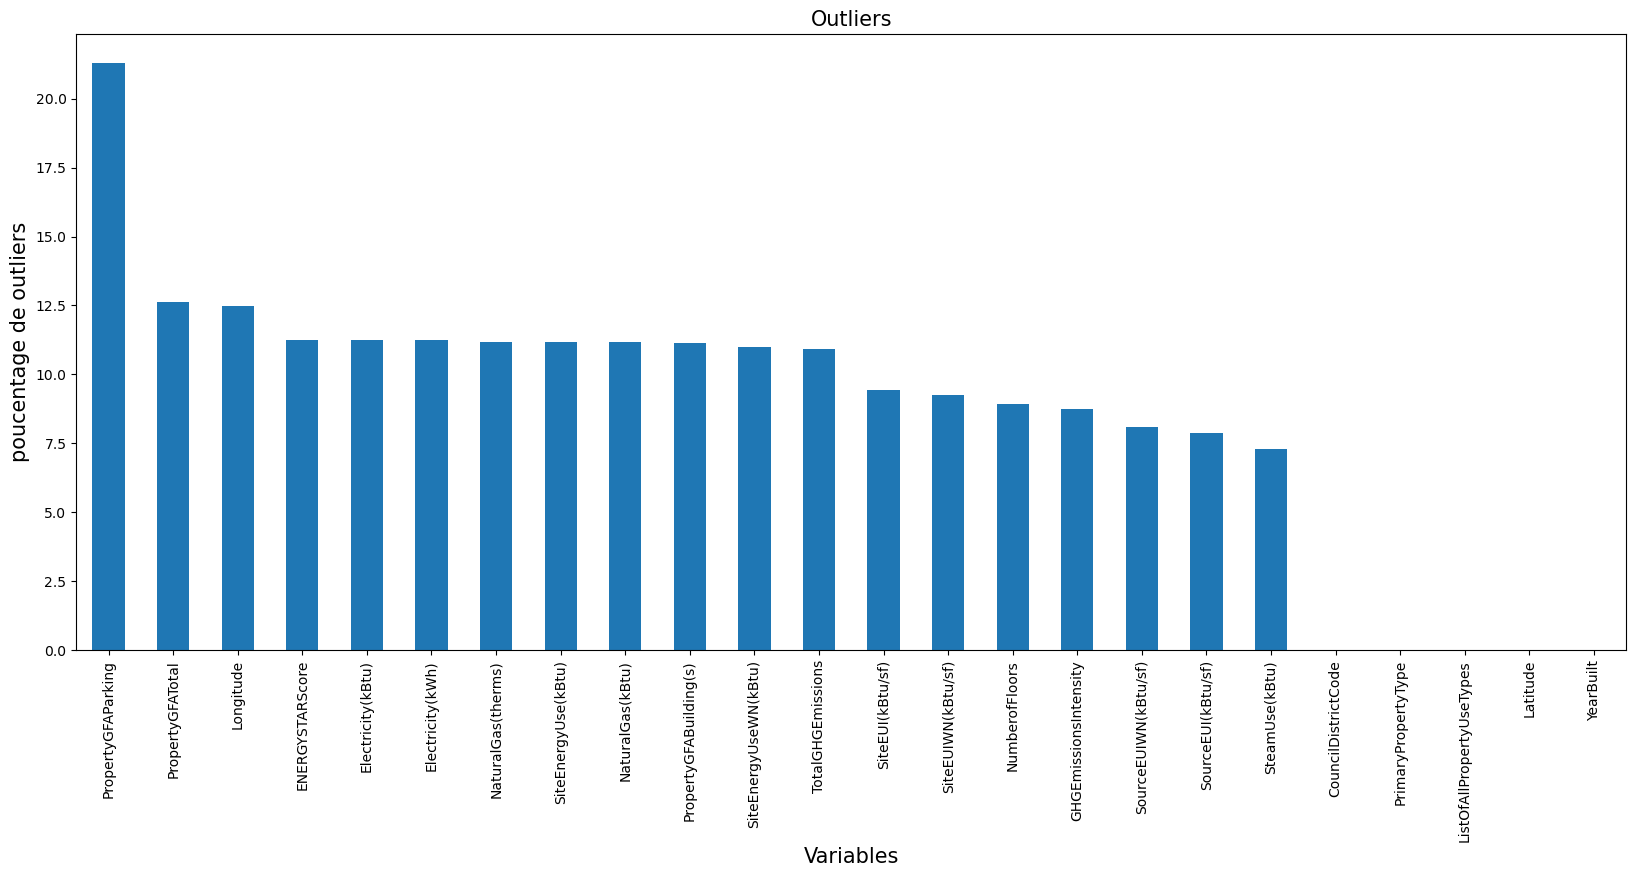

In [115]:
outliers_per.plot(kind='bar', figsize=(20, 8))
plt.xlabel('Variables', fontsize=15)
plt.ylabel('poucentage de outliers', fontsize=15)
plt.title('Outliers', fontsize=15)
plt.show()

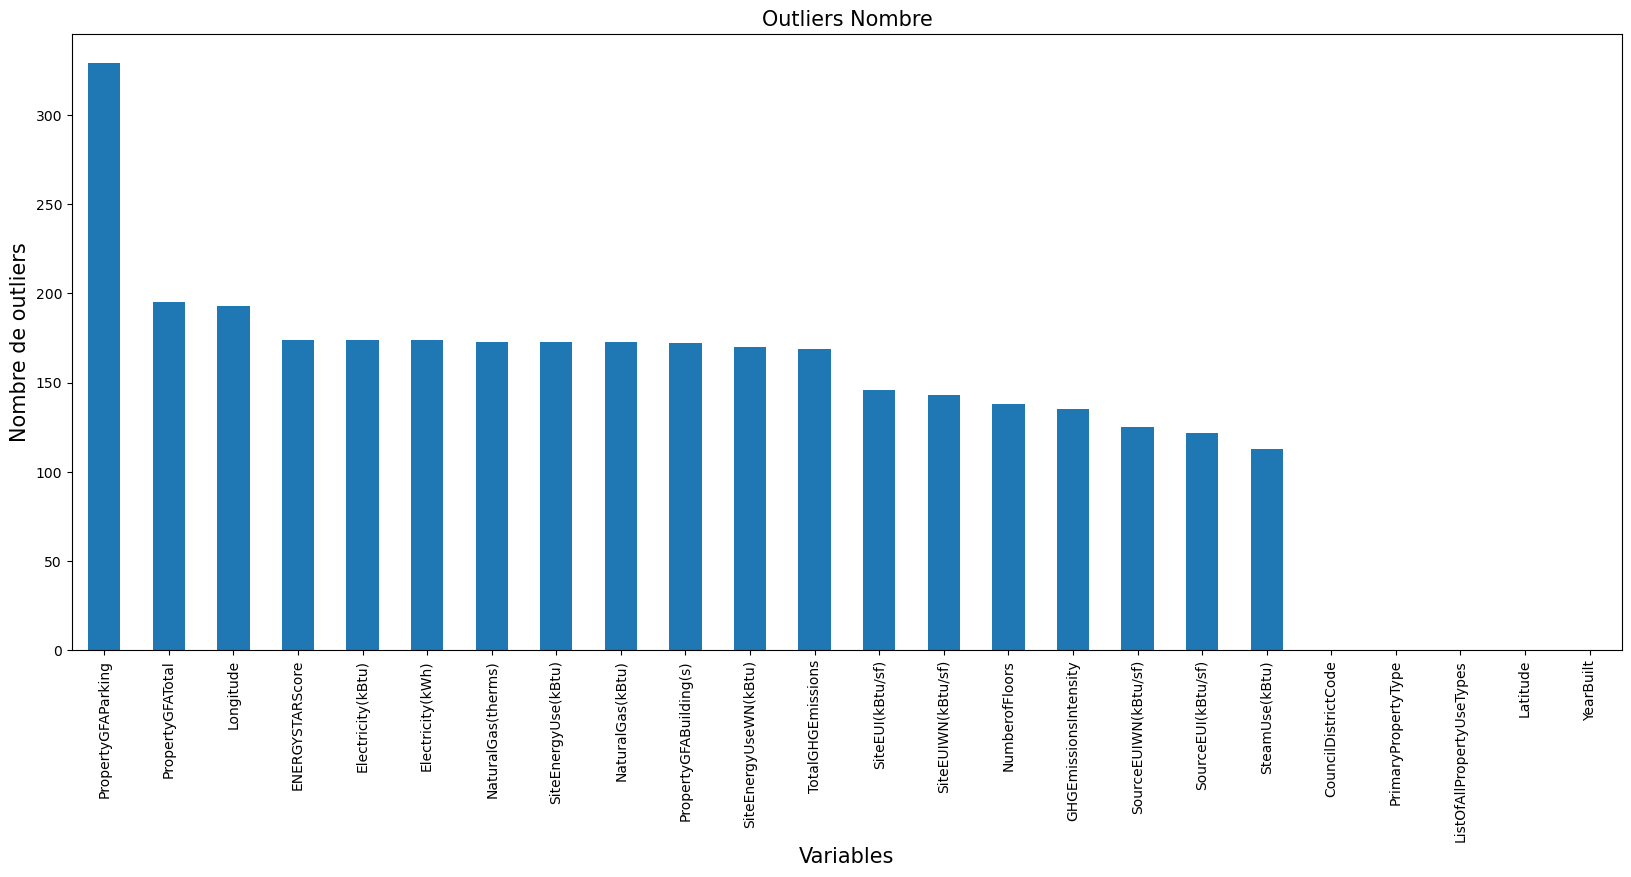

In [116]:
outliers_num.plot(kind='bar', figsize=(20, 8))
plt.xlabel('Variables', fontsize=15)
plt.ylabel('Nombre de outliers', fontsize=15)
plt.title('Outliers Nombre', fontsize=15)
plt.show()

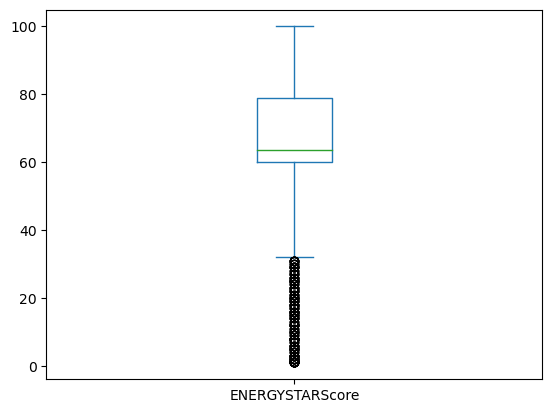

In [117]:
data_3['ENERGYSTARScore'].plot.box()
plt.show()

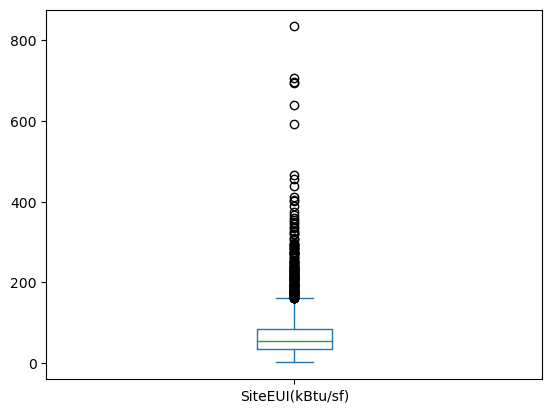

In [118]:
data_3['SiteEUI(kBtu/sf)'].plot.box()
plt.show()

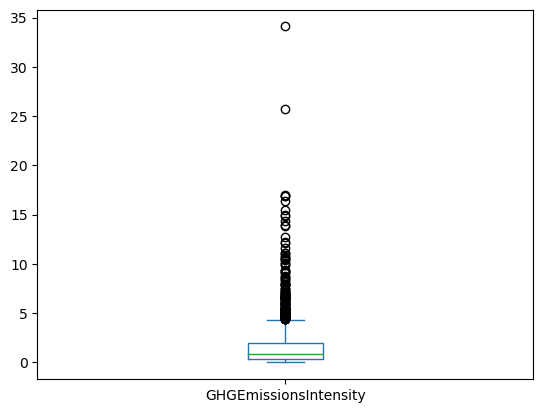

In [119]:
data_3['GHGEmissionsIntensity'].plot.box()
plt.show()

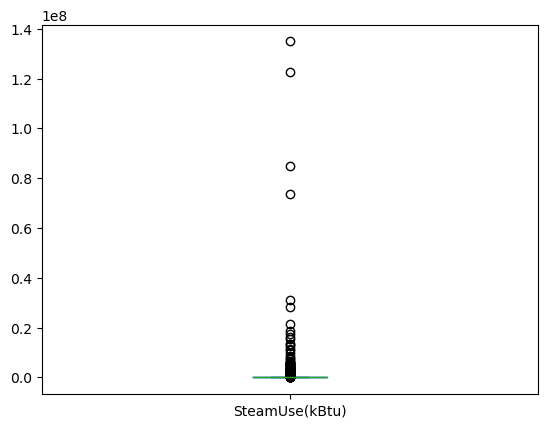

In [120]:
data_3['SteamUse(kBtu)'].plot.box()
plt.show()

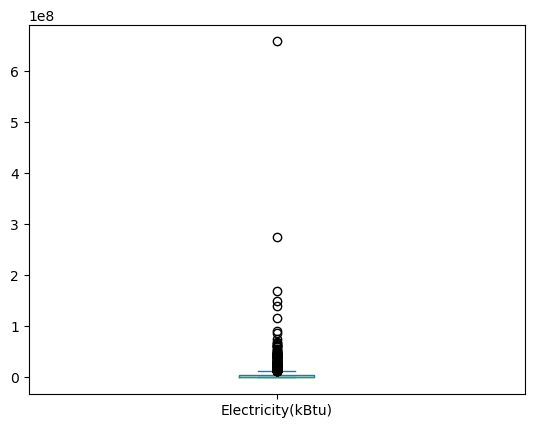

In [121]:
data_3['Electricity(kBtu)'].plot.box()
plt.show()

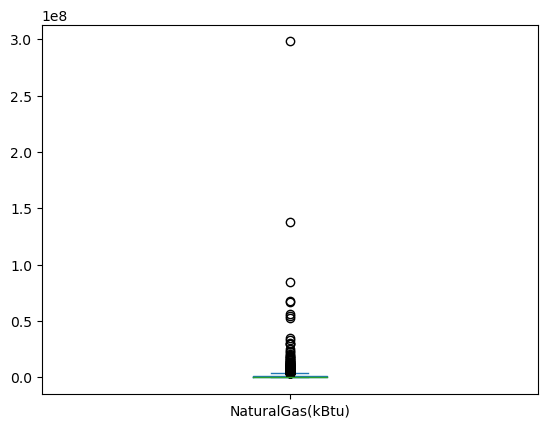

In [122]:
data_3['NaturalGas(kBtu)'].plot.box()
plt.show()

## 1.4 Transform categorial variables in numerical

In [123]:
from sklearn.preprocessing import LabelEncoder

data_4 = data_3.copy()
# create a LabelEncoder object
label_encoder = LabelEncoder()

# fit and transform the encoder on the categorical column
data_4['PrimaryPropertyType_encoded'] = label_encoder.fit_transform(data_4['PrimaryPropertyType'])
data_4['ListOfAllPropertyUseTypes_encoded'] = label_encoder.fit_transform(data_4['ListOfAllPropertyUseTypes'])

data_4 = data_4.drop(['PrimaryPropertyType', 'ListOfAllPropertyUseTypes'], axis = 1)
data_4.head()


,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,PrimaryPropertyType_encoded,ListOfAllPropertyUseTypes_encoded
0,7,47.61220,-122.33799,1927,12,88434,0,88434,60.0,81.699997,...,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83,2,129
1,7,47.61317,-122.33393,1996,11,103566,15064,88502,61.0,94.800003,...,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86,2,135
2,7,47.61393,-122.33810,1969,41,956110,196718,759392,43.0,96.000000,...,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19,2,129
3,7,47.61412,-122.33664,1926,10,61320,0,61320,56.0,110.800003,...,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67,2,129
4,7,47.61375,-122.34047,1980,18,175580,62000,113580,75.0,114.800003,...,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88,2,140


In [124]:
data_4.to_csv('data_4.csv')

In [126]:
data_5 = data_4.copy()

In [127]:
# 5. Supprimer les variables fortement corrélées
corr_matrix = data_5.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_17956\3972742801.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [128]:
print(to_drop)

['PropertyGFABuilding(s)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions']


In [129]:
print(corr_matrix)

                                   CouncilDistrictCode  Latitude  Longitude  \
CouncilDistrictCode                           1.000000  0.512858   0.348390   
Latitude                                      0.512858  1.000000   0.086717   
Longitude                                     0.348390  0.086717   1.000000   
YearBuilt                                     0.036138  0.083046   0.015413   
NumberofFloors                                0.278079  0.012191   0.004338   
PropertyGFATotal                              0.106478  0.004813   0.027832   
PropertyGFAParking                            0.190852  0.039332   0.021134   
PropertyGFABuilding(s)                        0.082963  0.000833   0.032287   
ENERGYSTARScore                               0.112339  0.041069   0.024320   
SiteEUI(kBtu/sf)                              0.063056  0.087922   0.004848   
SiteEUIWN(kBtu/sf)                            0.055190  0.082854   0.008077   
SourceEUI(kBtu/sf)                            0.0887

In [ ]:
df = df.drop(to_drop, axis=1)